# Problem Statement:
Avocado is a fruit consumed by people heavily in the United States. 

Content
This data was downloaded from the Hass Avocado Board website in May of 2018 & compiled into a single CSV. 

The table below represents weekly 2018 retail scan data for National retail volume (units) and price. Retail scan data comes directly from retailers’ cash registers based on actual retail sales of Hass avocados. 

Starting in 2013, the table below reflects an expanded, multi-outlet retail data set. Multi-outlet reporting includes an aggregation of the following channels: grocery, mass, club, drug, dollar and military. The Average Price (of avocados) in the table reflects a per unit (per avocado) cost, even when multiple units (avocados) are sold in bags. 

The Product Lookup codes (PLU’s) in the table are only for Hass avocados. Other varieties of avocados (e.g. greenskins) are not included in this table.

Some relevant columns in the dataset:

Date - The date of the observation
AveragePrice - the average price of a single avocado
type - conventional or organic
year - the year
Region - the city or region of the observation
Total Volume - Total number of avocados sold
4046 - Total number of avocados with PLU 4046 sold
4225 - Total number of avocados with PLU 4225 sold
4770 - Total number of avocados with PLU 4770 sold


Inspiration /Label 

Your task is to make a mode that can consider the data provided and predict the Average Price.

To download the dataset, use the link given below. 

Downlaod Files:
https://github.com/dsrscientist/Data-Science-ML-Capstone-Projects/blob/master/avocado.csv

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore')

In [2]:
ds=pd.read_csv('avacado.csv')

In [3]:
ds.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0.0,27-12-2015,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015.0,Albany
1,1.0,20-12-2015,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015.0,Albany
2,2.0,13-12-2015,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015.0,Albany
3,3.0,06-12-2015,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015.0,Albany
4,4.0,29-11-2015,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015.0,Albany


#### Checking for Dublicate values 

In [4]:
sum(ds.duplicated())

14950

In [5]:
ds=ds.drop_duplicates()

In [6]:
sum(ds.duplicated())

0

All the blank columns has been removed 

In [7]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1518 entries, 0 to 1517
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1517 non-null   float64
 1   Date          1517 non-null   object 
 2   AveragePrice  1517 non-null   float64
 3   Total Volume  1517 non-null   float64
 4   4046          1517 non-null   float64
 5   4225          1517 non-null   float64
 6   4770          1517 non-null   float64
 7   Total Bags    1517 non-null   float64
 8   Small Bags    1517 non-null   float64
 9   Large Bags    1517 non-null   float64
 10  XLarge Bags   1517 non-null   float64
 11  type          1517 non-null   object 
 12  year          1517 non-null   float64
 13  region        1517 non-null   object 
dtypes: float64(11), object(3)
memory usage: 177.9+ KB


- Most of the data is FloaT type and few object type 
- Object type - type, region, date

<AxesSubplot:>

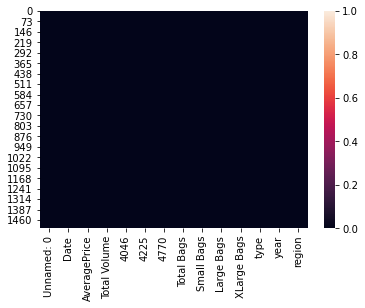

In [8]:
sns.heatmap(ds.isnull())

- no null values 

## Univariate Variable Analysis

In [9]:
sum(ds['XLarge Bags']==0.0)

798

798 distributions has not used Xlarge bags 

#### Conveting Date columns  to day and month 

In [10]:
ds['Date']=pd.to_datetime(ds['Date'])
ds['Date']

0      2015-12-27
1      2015-12-20
2      2015-12-13
3      2015-06-12
4      2015-11-29
          ...    
1513   2016-09-10
1514   2016-02-10
1515   2016-09-25
1516   2016-09-18
1517          NaT
Name: Date, Length: 1518, dtype: datetime64[ns]

In [11]:
ds['month'] = ds['Date'].apply(lambda date:pd.Period(date, freq='M'))
ds['month'].value_counts()

2015-05    142
2015-08    140
2015-03    126
2015-12    120
2015-01    119
2015-06    117
2015-11    105
2015-04    103
2015-09     79
2015-02     78
2015-10     72
2015-07     69
2016-03     32
2016-10     26
2016-11     26
2016-01     22
2016-02     22
2016-04     21
2016-05     18
2016-07     18
2016-06     17
2016-08     17
2016-12     16
2016-09     12
Freq: M, Name: month, dtype: int64

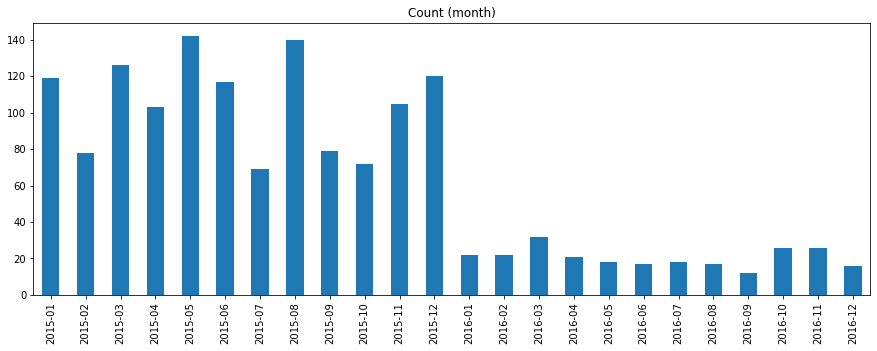

In [12]:
month_count=ds['month'].value_counts()
month_count.plot(kind='bar', title='Count (month)',figsize=(15,5));

MOST data are from 5th month  of 2015 - most distribution                
least data came from 9 th month of 2016 - least distribution month

In [13]:
ds.type.value_counts()

conventional    1517
Name: type, dtype: int64

- Columns Type has only single values - conventional, so will drop this column 

In [14]:
ds=ds.drop(['Date','Unnamed: 0','type'], axis=1)

In [15]:
region_count=ds['region'].value_counts()
print(region_count)

California             76
Albany                 67
BaltimoreWashington    65
Boise                  65
Boston                 62
Atlanta                54
PhoenixTucson          52
BuffaloRochester       51
Spokane                49
Columbus               47
NewYork                44
Jacksonville           41
Detroit                40
SouthCentral           39
SanDiego               38
West                   36
Louisville             34
Tampa                  34
Charlotte              31
Portland               30
Houston                29
NorthernNewEngland     29
WestTexNewMexico       27
TotalUS                25
Nashville              25
SouthCarolina          24
Denver                 24
Chicago                23
GrandRapids            23
Pittsburgh             22
Orlando                21
RichmondNorfolk        21
Syracuse               19
HarrisburgScranton     19
Midsouth               18
GreatLakes             18
Roanoke                17
DallasFtWorth          17
MiamiFtLaude

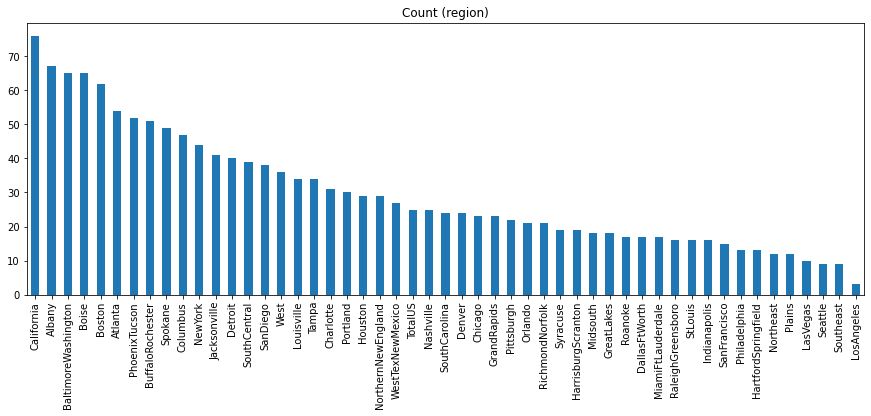

In [16]:
region_count.plot(kind='bar', title='Count (region)',figsize=(15,5));

- most distributed region - California             76         
- least distributed region - LosAngeles             3

In [17]:
ds.describe()

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,year
count,1517.000000,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1.517000e+03,1517.000000,1517.000000
mean,1.074990,1.601879e+06,6.464387e+05,6.114375e+05,5.040550e+04,2.935974e+05,2.487736e+05,4.264205e+04,2181.771074,2015.162821
std,0.188891,4.433143e+06,1.947614e+06,1.672906e+06,1.377812e+05,7.579765e+05,6.474765e+05,1.182157e+05,7455.712144,0.369324
min,0.490000,3.875074e+04,4.677200e+02,1.783770e+03,0.000000e+00,3.311770e+03,3.311770e+03,0.000000e+00,0.000000,2015.000000
25%,0.980000,1.474700e+05,2.040034e+04,4.147606e+04,9.112500e+02,3.620689e+04,2.972722e+04,5.407400e+02,0.000000,2015.000000
50%,1.080000,4.027919e+05,8.175117e+04,1.186649e+05,7.688170e+03,7.397906e+04,6.237569e+04,5.044350e+03,0.000000,2015.000000
75%,1.190000,9.819751e+05,3.775785e+05,4.851503e+05,2.916730e+04,1.576097e+05,1.461994e+05,2.926767e+04,401.480000,2015.000000
max,1.680000,4.465546e+07,1.893304e+07,1.895648e+07,1.381516e+06,6.736304e+06,5.893642e+06,1.121076e+06,108072.790000,2016.000000


- Target variable seems to be normally distributed  as mean and 50% is so close 

<AxesSubplot:xlabel='AveragePrice', ylabel='Density'>

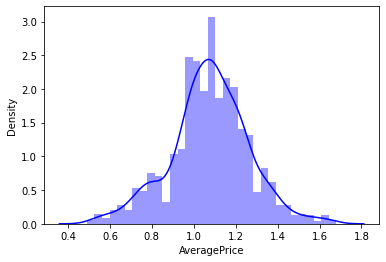

In [18]:
sns.distplot((ds.AveragePrice), color="b")

In [19]:
ds['year'].value_counts()

2015.0    1270
2016.0     247
Name: year, dtype: int64

array([<AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>, <AxesSubplot:>,
       <AxesSubplot:>, <AxesSubplot:>], dtype=object)

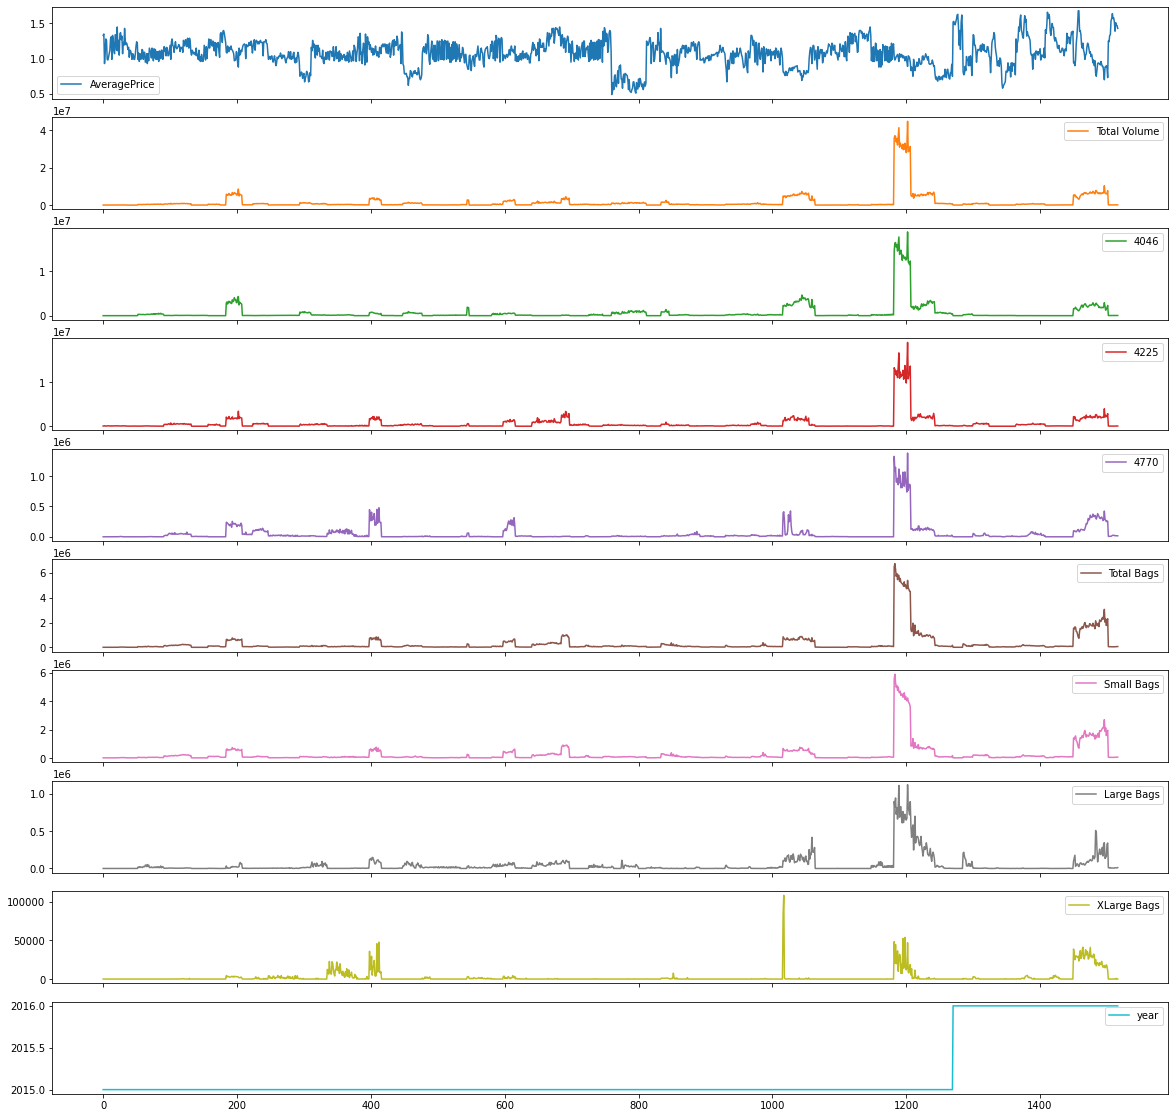

In [20]:
ds.plot.line(subplots = True, figsize=(20,20))

array([<AxesSubplot:title={'center':'AveragePrice'}>,
       <AxesSubplot:title={'center':'Total Volume'}>,
       <AxesSubplot:title={'center':'4046'}>,
       <AxesSubplot:title={'center':'4225'}>,
       <AxesSubplot:title={'center':'4770'}>,
       <AxesSubplot:title={'center':'Total Bags'}>,
       <AxesSubplot:title={'center':'Small Bags'}>,
       <AxesSubplot:title={'center':'Large Bags'}>,
       <AxesSubplot:title={'center':'XLarge Bags'}>,
       <AxesSubplot:title={'center':'year'}>], dtype=object)

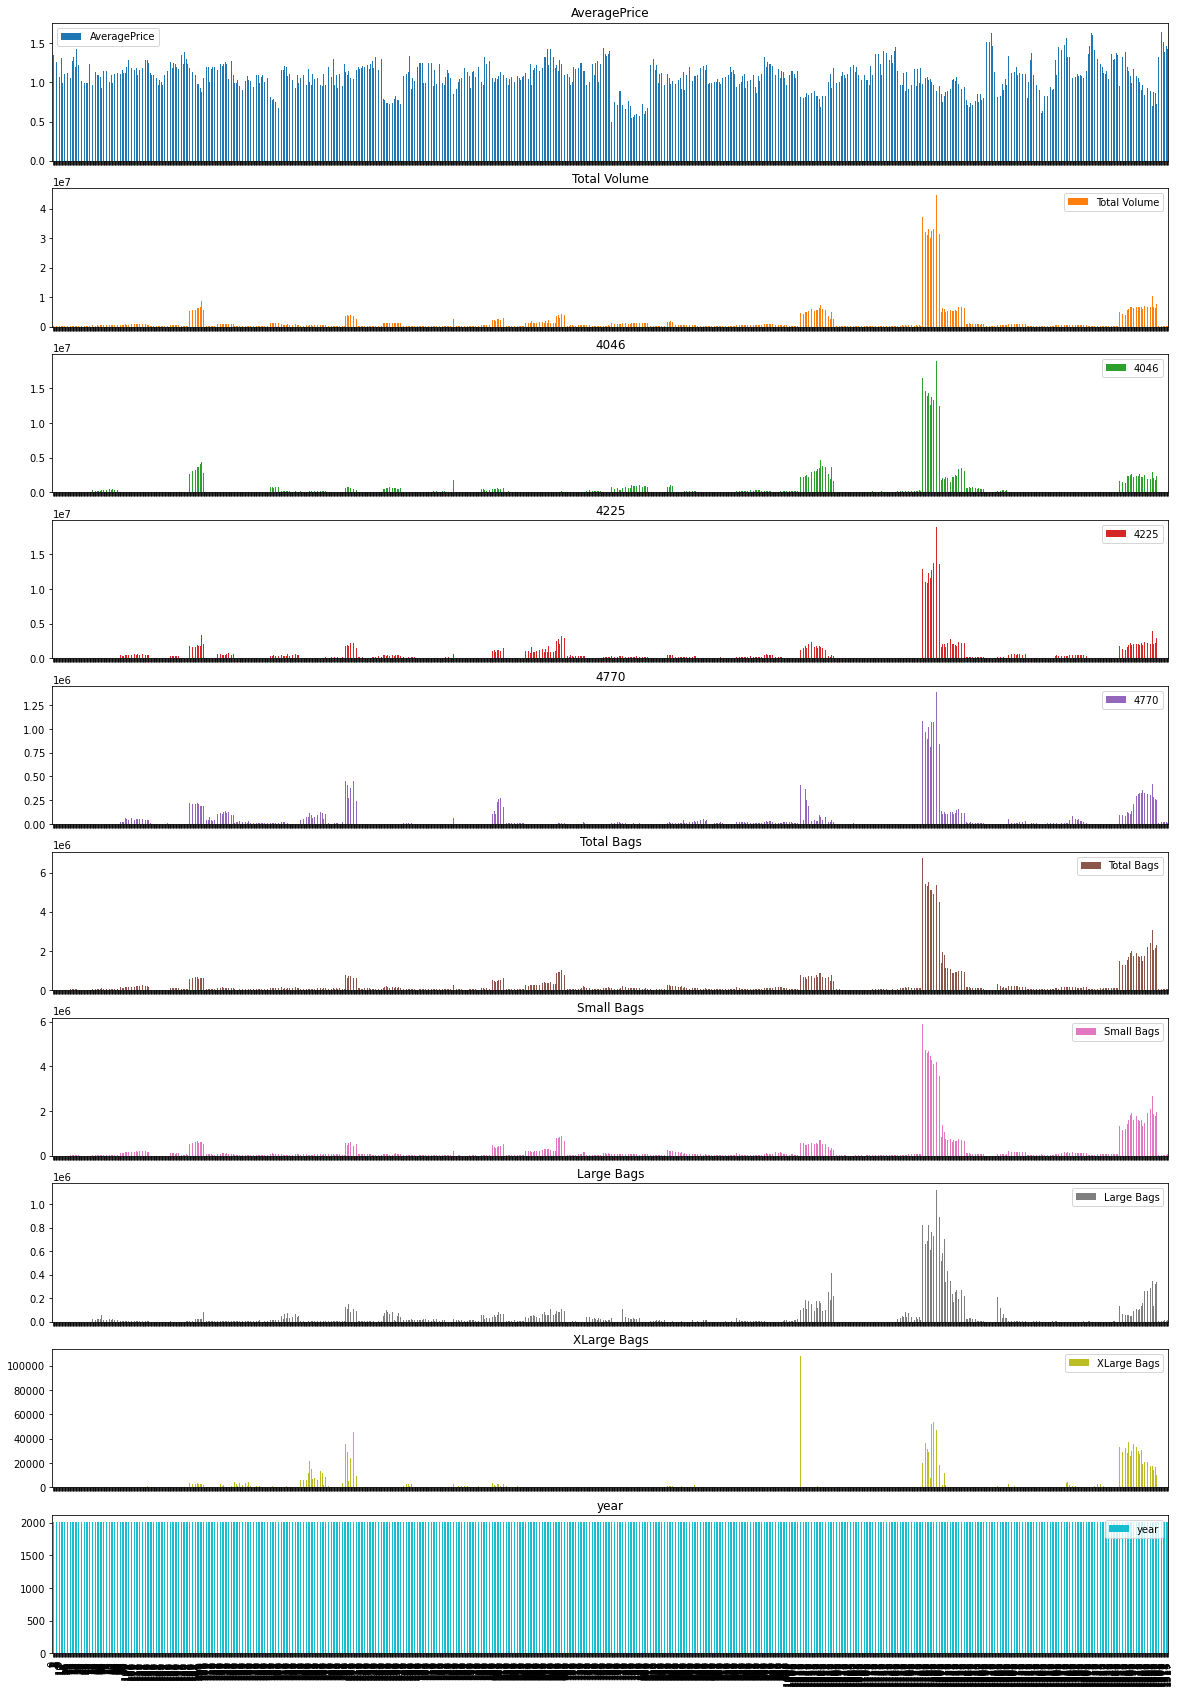

In [21]:
ds.plot.bar(subplots= True,stacked= False, figsize=(20,30))

In [22]:
#mean of Average Price
ds['AveragePrice'].mean()

1.0749901120632828

In [23]:
ds.groupby('month')['AveragePrice'].agg(['max', 'mean', 'min'])

,max,mean,min
month,,,
2015-01,1.40,1.039580,0.56
2015-02,1.45,1.114487,0.60
2015-03,1.45,1.074603,0.57
2015-04,1.44,1.069612,0.51
2015-05,1.43,1.073944,0.56
2015-06,1.37,1.015128,0.53
2015-07,1.37,1.045362,0.52
2015-08,1.40,1.070929,0.60
2015-09,1.33,1.045316,0.71


<AxesSubplot:xlabel='month'>

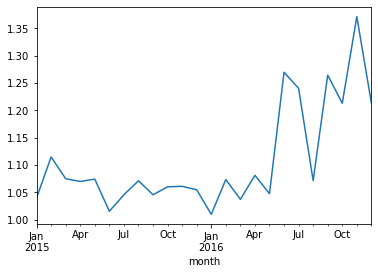

In [24]:
ds.groupby('month')['AveragePrice'].mean().plot(kind='line')

Distribution expanding                       
During 11th month 2016 mean avacado price goes highest but                
Highest Average price - 1.68 is recorded in month 10 & 6  of 2016                                  
Lowest Average price (0.49) in month - 12 2015           

In [25]:
ds.groupby('region')['AveragePrice'].mean().sort_values(ascending=False)

region
Syracuse               1.347368
Charlotte              1.311613
BuffaloRochester       1.301569
Philadelphia           1.293846
StLouis                1.260000
NewYork                1.248636
Albany                 1.238657
Northeast              1.236667
Chicago                1.214783
HartfordSpringfield    1.209231
Boston                 1.205484
Pittsburgh             1.178636
MiamiFtLauderdale      1.176471
RaleighGreensboro      1.166250
BaltimoreWashington    1.160923
HarrisburgScranton     1.157368
SanFrancisco           1.150667
GrandRapids            1.136957
Orlando                1.133333
Indianapolis           1.126250
Jacksonville           1.113659
NorthernNewEngland     1.111034
GreatLakes             1.107222
Roanoke                1.096471
Spokane                1.096122
Southeast              1.091111
Midsouth               1.081111
Denver                 1.080833
SouthCarolina          1.071250
Tampa                  1.068824
California             1.055921
S

Syracuse is region with highest average price                1.347368                           
lowest in region PhoenixTucson          0.659808

In [26]:
ds.groupby('region')['Total Volume'].mean().sort_values(ascending=False)

region
TotalUS                3.293714e+07
California             6.035277e+06
West                   5.574939e+06
SouthCentral           5.496995e+06
Northeast              3.465864e+06
GreatLakes             3.276358e+06
Southeast              3.055239e+06
LosAngeles             2.732180e+06
Midsouth               2.355099e+06
Plains                 1.672975e+06
NewYork                1.362973e+06
DallasFtWorth          1.195363e+06
Houston                1.115564e+06
PhoenixTucson          1.088699e+06
WestTexNewMexico       8.602926e+05
SanFrancisco           8.501176e+05
Chicago                8.118822e+05
BaltimoreWashington    8.076442e+05
Denver                 7.176015e+05
Boston                 5.534586e+05
SanDiego               5.013533e+05
Portland               4.951845e+05
Seattle                4.895311e+05
MiamiFtLauderdale      4.713218e+05
Atlanta                4.676372e+05
NorthernNewEngland     3.959559e+05
Philadelphia           3.849221e+05
Detroit              

In [27]:
ds.groupby('month')['Total Volume'].mean().sort_values(ascending=False)

month
2016-07    2.217648e+06
2015-05    2.025253e+06
2015-01    1.984611e+06
2016-08    1.918387e+06
2016-05    1.868668e+06
2015-03    1.867653e+06
2015-04    1.857106e+06
2015-06    1.804561e+06
2015-07    1.756250e+06
2016-03    1.598049e+06
2016-06    1.594725e+06
2016-01    1.580008e+06
2015-10    1.532913e+06
2015-02    1.530926e+06
2016-09    1.500425e+06
2016-04    1.489546e+06
2016-02    1.473113e+06
2016-10    1.420263e+06
2015-08    1.378348e+06
2016-12    1.268990e+06
2015-12    1.163282e+06
2015-11    1.096834e+06
2015-09    1.070826e+06
2016-11    1.044938e+06
Freq: M, Name: Total Volume, dtype: float64

May - month 7 of 2016 seems to be avacado month  as highest volume has been sold

<AxesSubplot:xlabel='Total Bags', ylabel='AveragePrice'>

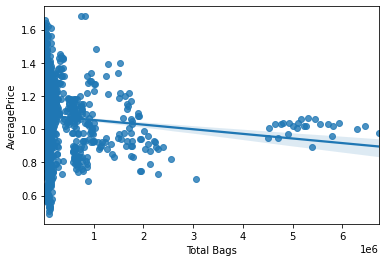

In [28]:
sns.regplot(ds['Total Bags'],ds['AveragePrice'])

-  the total bag is low, average price is higher.                  
Demand and supply

<AxesSubplot:xlabel='Total Volume', ylabel='AveragePrice'>

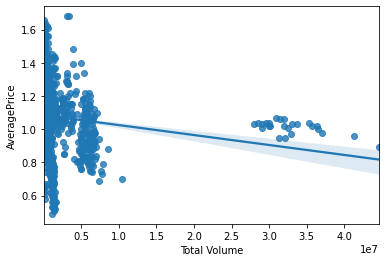

In [29]:
sns.regplot(x='Total Volume',y='AveragePrice',data=ds)

The Total volume is low, Average Price is high shows the similar results 

In [30]:
ds[['Total Volume', '4046', '4225', '4770', 'Total Bags',
       'Small Bags', 'Large Bags', 'XLarge Bags']].corr()

,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags
Total Volume,1.000000,0.985568,0.987154,0.934347,0.967689,0.960642,0.910226,0.521717
4046,0.985568,1.000000,0.951952,0.898570,0.930395,0.922278,0.884229,0.474063
4225,0.987154,0.951952,1.000000,0.927757,0.951779,0.943988,0.900496,0.504718
4770,0.934347,0.898570,0.927757,1.000000,0.926405,0.923607,0.840523,0.646053
Total Bags,0.967689,0.930395,0.951779,0.926405,1.000000,0.997341,0.911336,0.601856
Small Bags,0.960642,0.922278,0.943988,0.923607,0.997341,1.000000,0.879131,0.611300
Large Bags,0.910226,0.884229,0.900496,0.840523,0.911336,0.879131,1.000000,0.447779
XLarge Bags,0.521717,0.474063,0.504718,0.646053,0.601856,0.611300,0.447779,1.000000


Total volume is highly correlated to - 4046 , 4225 , Total Bags, Small Bags                   
so will remove those columns 

In [31]:
ds.drop(columns=['4046', '4225', 'Total Bags', 'Small Bags'], inplace=True)

In [32]:
ds.corr()

,AveragePrice,Total Volume,4770,Large Bags,XLarge Bags,year
AveragePrice,1.000000,-0.140470,-0.100567,-0.177480,-0.048284,0.178683
Total Volume,-0.140470,1.000000,0.934347,0.910226,0.521717,-0.004189
4770,-0.100567,0.934347,1.000000,0.840523,0.646053,0.029222
Large Bags,-0.177480,0.910226,0.840523,1.000000,0.447779,-0.018678
XLarge Bags,-0.048284,0.521717,0.646053,0.447779,1.000000,0.218342
year,0.178683,-0.004189,0.029222,-0.018678,0.218342,1.000000


In [33]:
ds.tail(2)

,AveragePrice,Total Volume,4770,Large Bags,XLarge Bags,year,region,month
1516,1.43,182978.3,16563.91,11648.35,0.0,2016.0,Charlotte,2016-09
1517,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [34]:
ds=ds.dropna()

There are 3 categorical features and as per below table we will perform encoding on each feature.                     

Column	Type of Encoding                                                        
Year	Label - To keep the ordinal importance                             
Region	Target - As it has high cardinality we can use TargetEncoding to have effect of each Region on AveragePrice                           
Month	Target - As it has high cardinality we can use TargetEncoding to have effect of each Month on AveragePrice             Day  

In [35]:
# Label Encoding on Year for Train set.
from sklearn.preprocessing import LabelEncoder         # Importing Label Encoder
le= LabelEncoder()

In [36]:
ds['year']=le.fit_transform(ds.year)

In [37]:
ds['month']=le.fit_transform(ds.month)

In [38]:
ds['region']=le.fit_transform(ds.region)

In [39]:
col=ds.columns
col

Index(['AveragePrice', 'Total Volume', '4770', 'Large Bags', 'XLarge Bags',
       'year', 'region', 'month'],
      dtype='object')

AveragePrice        AxesSubplot(0.125,0.71587;0.352273x0.16413)
Total Volume     AxesSubplot(0.547727,0.71587;0.352273x0.16413)
4770               AxesSubplot(0.125,0.518913;0.352273x0.16413)
Large Bags      AxesSubplot(0.547727,0.518913;0.352273x0.16413)
XLarge Bags        AxesSubplot(0.125,0.321957;0.352273x0.16413)
year            AxesSubplot(0.547727,0.321957;0.352273x0.16413)
region                AxesSubplot(0.125,0.125;0.352273x0.16413)
month              AxesSubplot(0.547727,0.125;0.352273x0.16413)
dtype: object

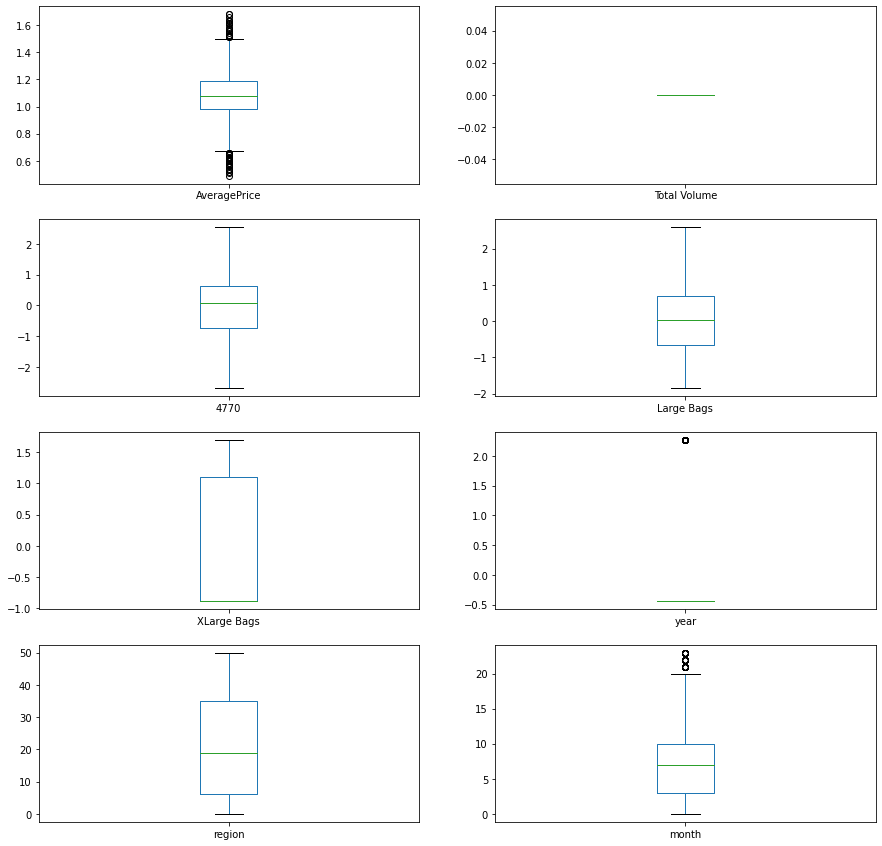

In [88]:
ds.plot(kind='box',subplots=True, layout=(4,2),figsize=(15,15))

- NO AS SUCH OUTLIERS PRESENT 

In [40]:
from scipy.stats import probplot

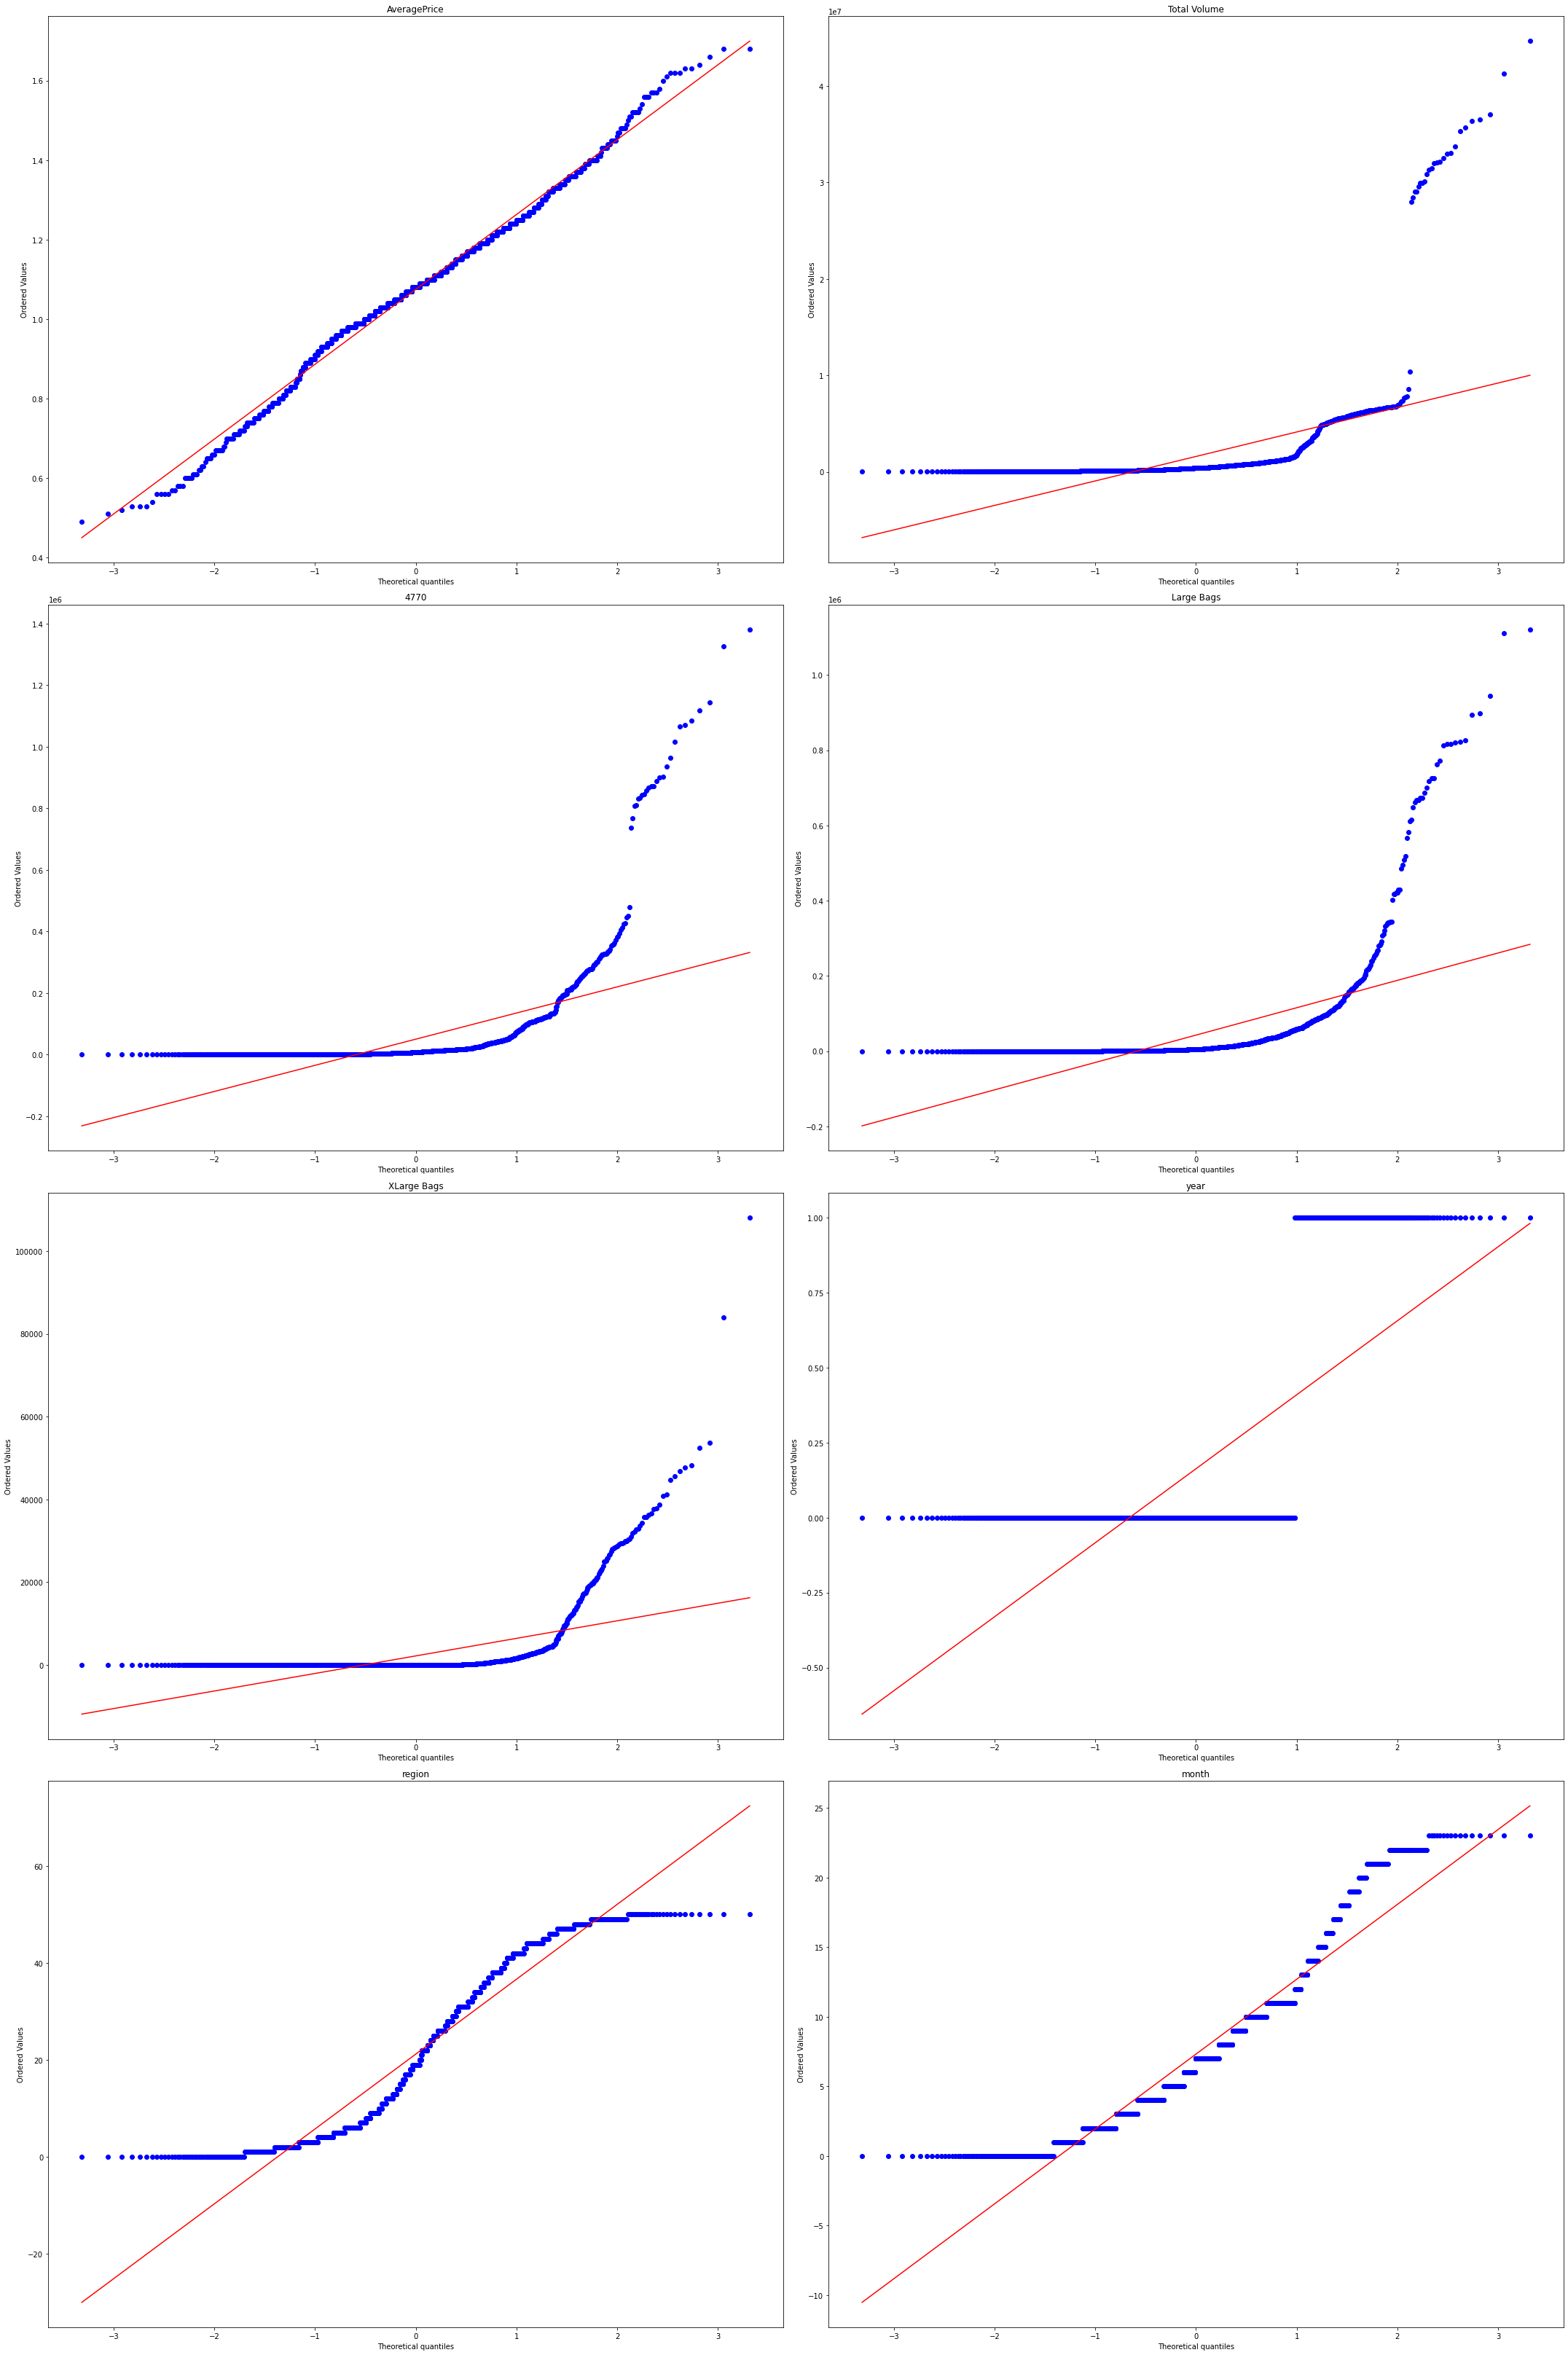

In [41]:
plt.figure(figsize=(30,45))
for i in range(8):
    plt.subplot(4,2,i+1)
    probplot(ds[col[i]],plot=plt,dist='norm')
    plt.title(col[i])
    plt.tight_layout()

- DATA SPREAD SEEMS TO HAVE SKEWNESS 

In [42]:
ds.skew()

AveragePrice   -0.109444
Total Volume    6.200138
4770            5.405164
Large Bags      5.144495
XLarge Bags     5.775077
year            1.828332
region          0.288146
month           0.924134
dtype: float64

SKEWNESS PRESENT IN Total Volume, 4770, XLarge Bags 

In [107]:
#Skewness REMOVE
from sklearn.preprocessing import PowerTransformer

In [44]:
pt=PowerTransformer()
for x in ds.columns.drop('AveragePrice'):
    if abs(ds.loc[:,x].skew())>1:
        ds.loc[:,x]=pt.fit_transform(ds.loc[:,x].values.reshape(-1,1))

In [45]:
ds.skew()

AveragePrice   -0.109444
Total Volume    0.000000
4770           -0.032945
Large Bags     -0.074795
XLarge Bags     0.417289
year            1.828332
region          0.288146
month           0.924134
dtype: float64

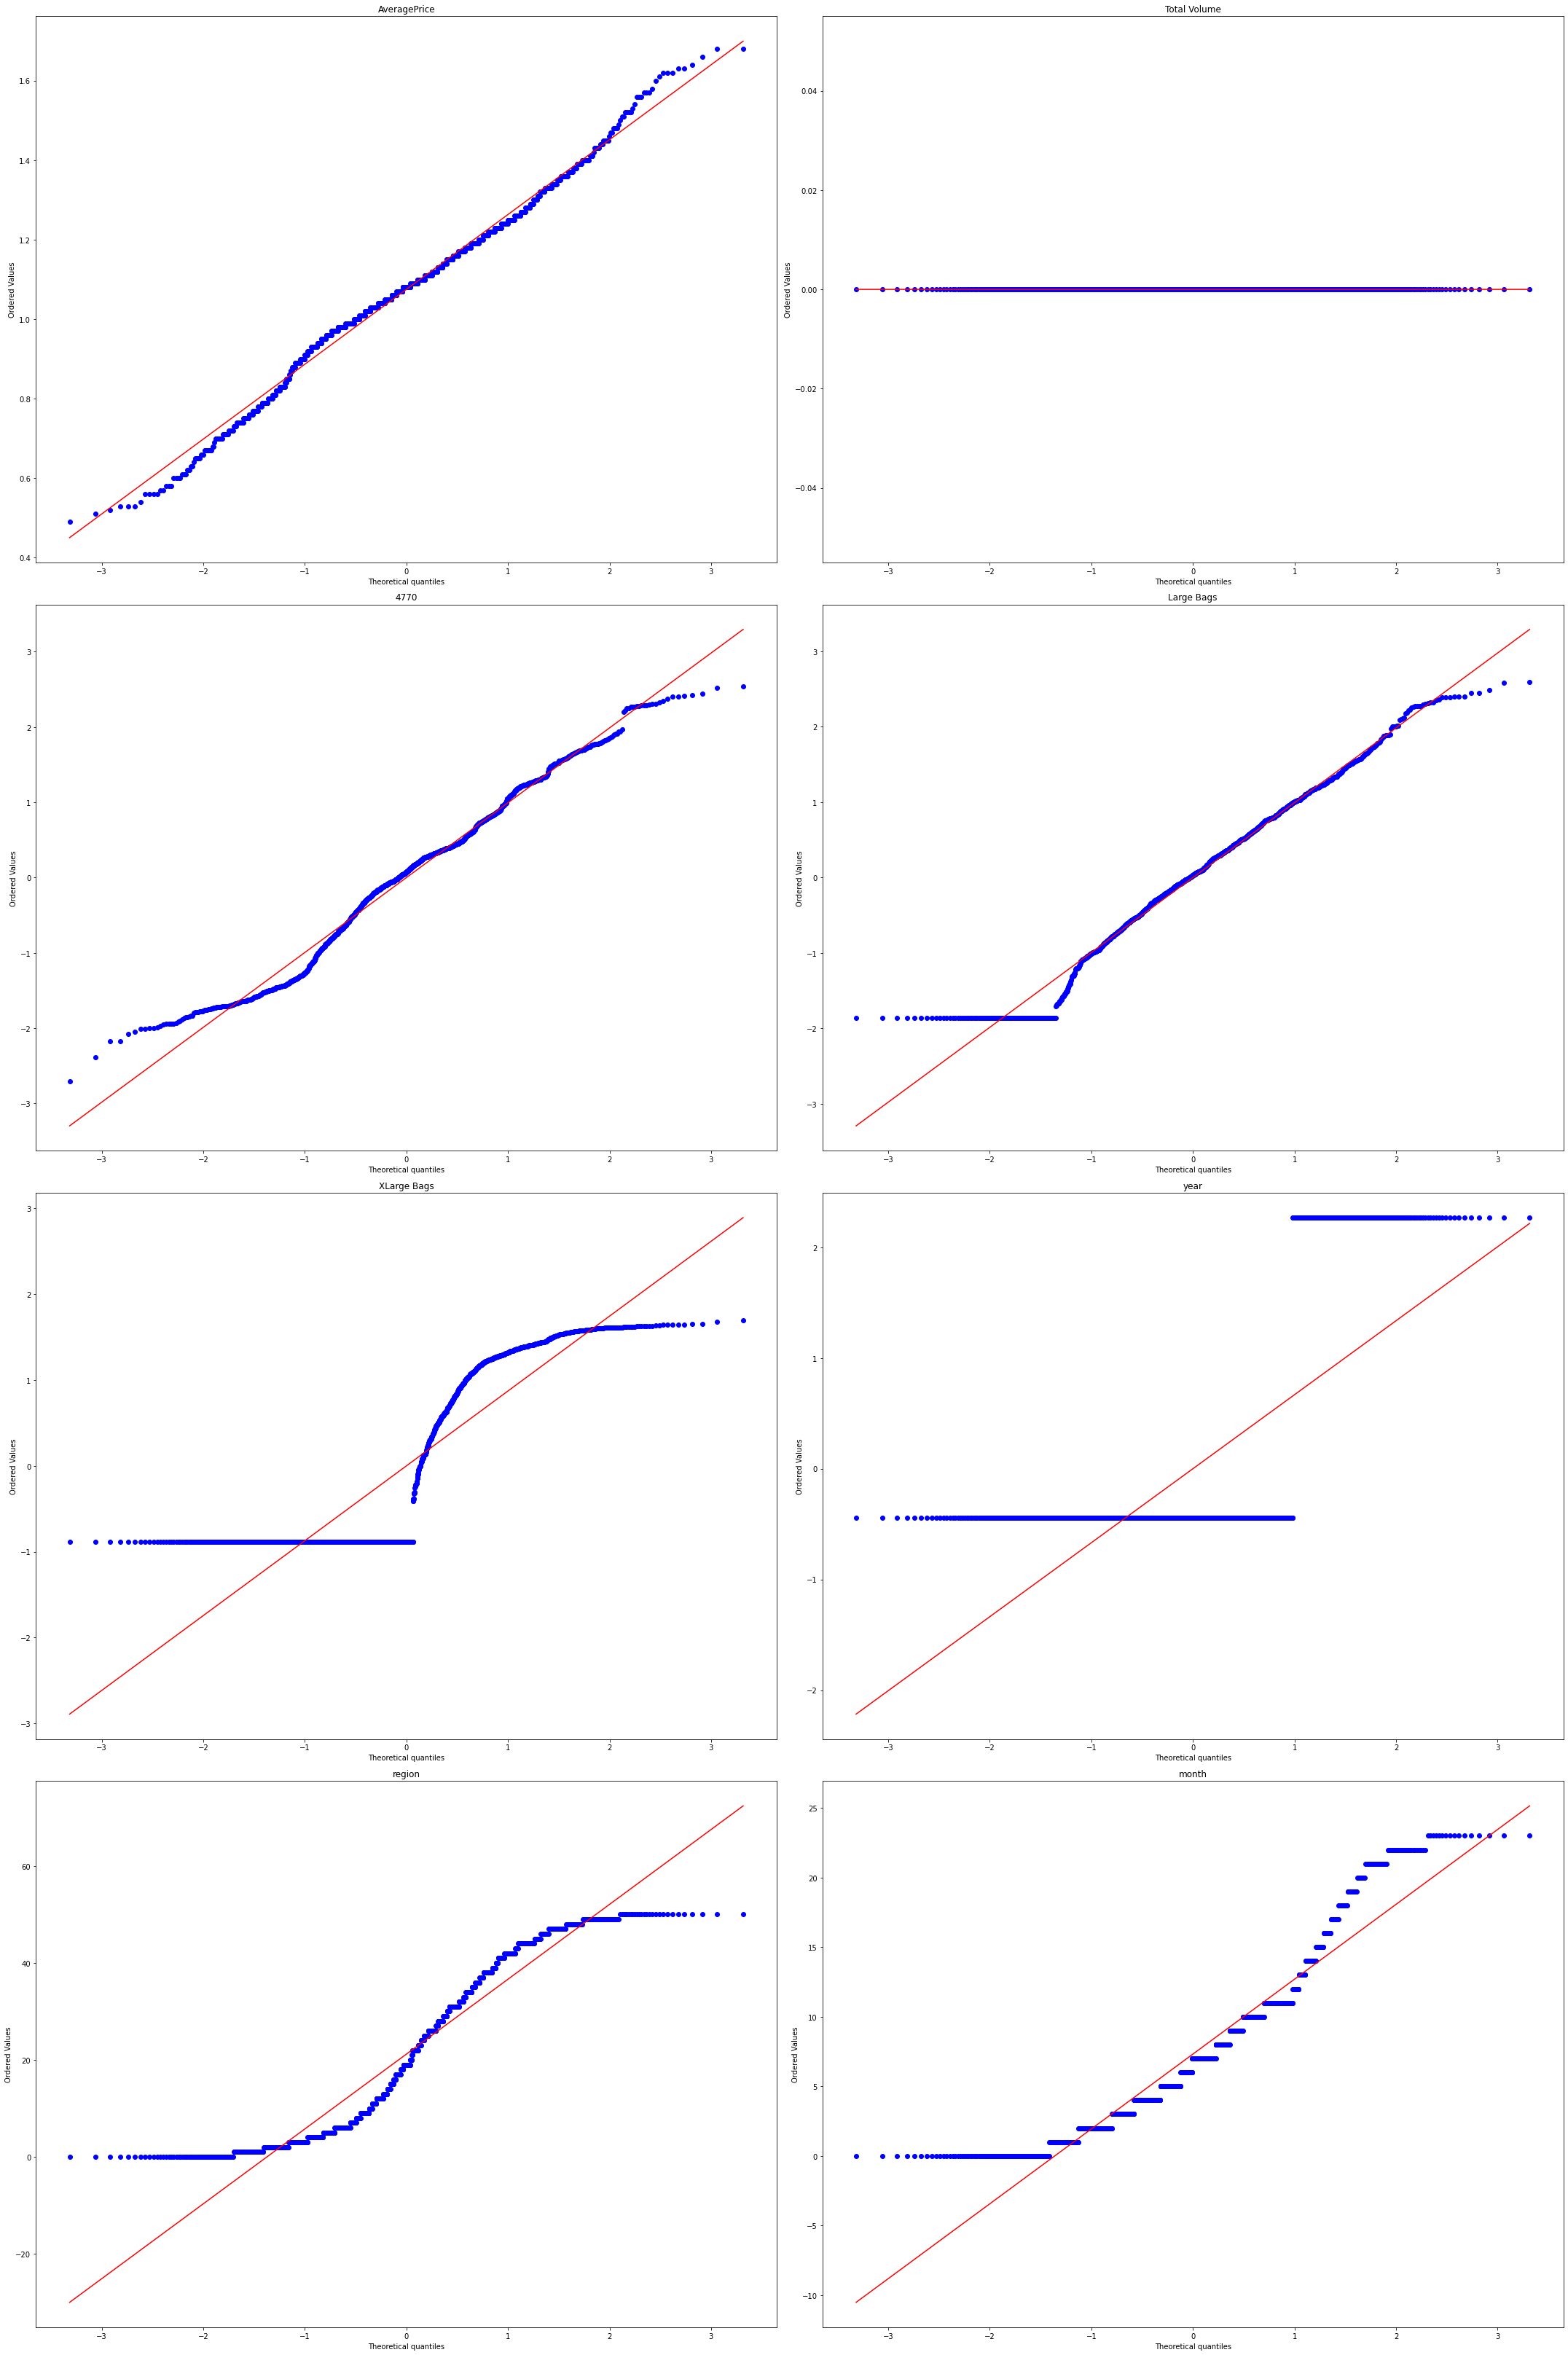

In [87]:
#PLOT AFTER REMOVING SKEWNESS 
plt.figure(figsize=(30,45))
for i in range(8):
    plt.subplot(4,2,i+1)
    probplot(ds[col[i]],plot=plt,dist='norm')
    plt.title(col[i])
    plt.tight_layout()

In [46]:
X=ds.drop('AveragePrice',axis=1)
y=ds['AveragePrice']

### SCALING THE  DATA 

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
sc=StandardScaler()
X=sc.fit_transform(X)

# ML ALGORTHIM 

In [75]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV,KFold
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [66]:
#Define a function to try different train test folds
def model_select(model):
    max_score=0
    max_state=0
    for x in range(42,105):
        X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.33, random_state=x)
        md=model()
        md.fit(X_train,y_train)
        predict=md.predict(X_test)
        r2score=r2_score(y_test,predict)
        if r2score>max_score:
            max_score=r2score
            max_state=x
    print("Max score is {} with random state {}".format(max_score,max_state))

In [67]:
model_select(LinearRegression)

Max score is 0.18096824105002074 with random state 82


In [68]:
model_select(RandomForestRegressor)

Max score is 0.7362787314767796 with random state 82


In [53]:
model_select(ElasticNet)

Max score is 0.028515072954872323 with random state 56


In [54]:
model_select(Ridge)

Max score is 0.1809217270698935 with random state 82


In [55]:
model_select(Lasso)

Max score is 0 with random state 0


In [56]:
model_select(KNeighborsRegressor)

Max score is 0.591896464743275 with random state 55


In [57]:
model_select(AdaBoostRegressor)

Max score is 0.506175499482278 with random state 67


Random forest shows the best score 

### RANDOM FOREST 

In [61]:
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.33,random_state=82)

In [69]:
rf=RandomForestRegressor()
rf.fit(x_train,y_train)
predict=rf.predict(x_test)
print('r2 score : ',r2_score(y_test,predict))
r2= r2_score(y_test,predict)
print('mean squared error : ',mean_squared_error(y_test,predict))

r2 score :  0.7355269191735652
mean squared error :  0.009704766686626736


#### CROSS VALIDATION

In [102]:
scores = cross_val_score(rf, x_train, y_train, scoring='r2', cv=9)
print(scores)
print('mean score',sum(scores)/len(scores))

[0.70150569 0.54791236 0.60007954 0.72578263 0.67770918 0.6474981
 0.71573391 0.60774003 0.65196853]
mean score 0.652881109186691


## HYPER TUNING WITH BEST PARAMETER 

In [104]:
param_grid = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000],
   
}


In [105]:
rf = RandomForestRegressor()

grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 9, n_jobs = -1, verbose = 2)

In [106]:
grid_search.fit(x_train, y_train)
grid_search.best_params_

Fitting 9 folds for each of 288 candidates, totalling 2592 fits


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 8,
 'n_estimators': 100}

In [108]:
def evaluate(model, X_test, y_test):
    predictions = model.predict(X_test)
    r2score=r2_score(y_test,predictions)
     

    print('Model Performance')
    print('r2 score = ', r2score)
    print('mean_squared_error:  ', mean_squared_error(y_test,predictions))
    
    return 

In [109]:
best_grid = grid_search.best_estimator_
grid_accuracy = evaluate(best_grid, x_test, y_test)  

Model Performance
r2 score =  0.6922653984836123
mean_squared_error:   0.01129223624493765


SCORE - DON'T IMROVE MUCH 
BUT ERROR REDUCED 

# SAVING THE MODEL 

In [110]:
import joblib 
joblib.dump(rf,'avacado.pkl')

['avacado.pkl']

In [111]:
#load the model
model = joblib.load('avacado.pkl')
model.fit(x_train, y_train)
predy =model.predict(x_test)
print('r2 score=',r2_score(y_test,predy))
mean_squared_error(y_test,predy)

r2 score= 0.7443254239191289


0.009381907984031929